In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import pytz
import matplotlib.pyplot as plt
import seaborn as sns
import re

df=pd.read_csv("loan.csv", sep=',')
df.head()

C:\Users\SNEHA\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [2]:
#Checking null values across each column

round(100*(df.isnull().sum()/len(df.index)), 2)

id                                  0.00
member_id                           0.00
loan_amnt                           0.00
funded_amnt                         0.00
funded_amnt_inv                     0.00
term                                0.00
int_rate                            0.00
installment                         0.00
grade                               0.00
sub_grade                           0.00
emp_title                           6.19
emp_length                          2.71
home_ownership                      0.00
annual_inc                          0.00
verification_status                 0.00
issue_d                             0.00
loan_status                         0.00
pymnt_plan                          0.00
url                                 0.00
desc                               32.58
purpose                             0.00
title                               0.03
zip_code                            0.00
addr_state                          0.00
dti             

In [3]:
#If we go through the data properly we can see that there are many  columns with all null values 
#These  columns do not convey any information about data
#we can remove them

df=df.dropna(axis=1, how='all')
round(100*(df.isnull().sum()/len(df.index)), 2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

In [4]:
#There are columns with null values above 90%
#They  really do not provide any information hence we cannot continue with such columns
df=df.drop(['next_pymnt_d', 'mths_since_last_record'] , axis=1)
round(100*(df.isnull().sum()/len(df.index)), 2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

In [5]:
#condider desc and mths_since_last_delinq  with 32% and  64%  null values respectively
#desc column and purpose column provide nearly similar information as seen below
df[['desc', 'purpose']].head()

,desc,purpose
0,Borrower added on 12/22/11 > I need to upgra...,credit_card
1,Borrower added on 12/22/11 > I plan to use t...,car
2,NaN,small_business
3,Borrower added on 12/21/11 > to pay for prop...,other
4,Borrower added on 12/21/11 > I plan on combi...,other


In [6]:
#Also purpose column has no null values as the desc column so its better 
#to consider the purpose column rather than desc

#Also mths_since_last_delinq  has high null value nealy 64%, generally columns with null values greater than 50% is not considered
#for analysis hence  remove both the columns
df=df.drop(['desc','mths_since_last_delinq'] , axis=1)
round(100*(df.isnull().sum()/len(df.index)), 2)

id                            0.00
member_id                     0.00
loan_amnt                     0.00
funded_amnt                   0.00
funded_amnt_inv               0.00
term                          0.00
int_rate                      0.00
installment                   0.00
grade                         0.00
sub_grade                     0.00
emp_title                     6.19
emp_length                    2.71
home_ownership                0.00
annual_inc                    0.00
verification_status           0.00
issue_d                       0.00
loan_status                   0.00
pymnt_plan                    0.00
url                           0.00
purpose                       0.00
title                         0.03
zip_code                      0.00
addr_state                    0.00
dti                           0.00
delinq_2yrs                   0.00
earliest_cr_line              0.00
inq_last_6mths                0.00
open_acc                      0.00
pub_rec             

In [7]:
df.emp_title.describe()

count       37258
unique      28820
top       US Army
freq          134
Name: emp_title, dtype: object

In [8]:
#As you can see there are 28820 unique entries in emp_title column considering the null values as 6% its 
#not good to replace all the  values let us not change this column
#consider emp_length column
#null values are nearly 2% let us remove the null values

df=df[~pd.isnull(df['emp_length'])]
round(100*(df.isnull().sum()/len(df.index)), 2)

id                            0.00
member_id                     0.00
loan_amnt                     0.00
funded_amnt                   0.00
funded_amnt_inv               0.00
term                          0.00
int_rate                      0.00
installment                   0.00
grade                         0.00
sub_grade                     0.00
emp_title                     3.73
emp_length                    0.00
home_ownership                0.00
annual_inc                    0.00
verification_status           0.00
issue_d                       0.00
loan_status                   0.00
pymnt_plan                    0.00
url                           0.00
purpose                       0.00
title                         0.03
zip_code                      0.00
addr_state                    0.00
dti                           0.00
delinq_2yrs                   0.00
earliest_cr_line              0.00
inq_last_6mths                0.00
open_acc                      0.00
pub_rec             

In [9]:
#consider application _type colummn
df['application_type'].describe()

count          38642
unique             1
top       INDIVIDUAL
freq           38642
Name: application_type, dtype: object

In [10]:
#earliest_cr_line revol_bal  revol_util 
#out_prncp
#out_prncp_inv
#total_rec_prncp               
#total_rec_int                 
#total_rec_late_fee
#recoveries                    
#collection_recovery_fee       
#last_pymnt_d                  
#last_pymnt_amnt   
#application_type
#all these  columns  should be considered  after the  loan is applied so not necessary at this instant of analysis
#application_type  no variance
#zip_code imcomple 
#url
#title
#Hence  such columns can be removed

df=df.drop([ 'earliest_cr_line', 'revol_bal', 'revol_util', 'out_prncp', 'out_prncp_inv',
            'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 
            'last_pymnt_d', 'last_pymnt_amnt', 'application_type', 'zip_code', 'title', 'url'], axis=1)

round(100*(df.isnull().sum()/len(df.index)), 2)

id                            0.00
member_id                     0.00
loan_amnt                     0.00
funded_amnt                   0.00
funded_amnt_inv               0.00
term                          0.00
int_rate                      0.00
installment                   0.00
grade                         0.00
sub_grade                     0.00
emp_title                     3.73
emp_length                    0.00
home_ownership                0.00
annual_inc                    0.00
verification_status           0.00
issue_d                       0.00
loan_status                   0.00
pymnt_plan                    0.00
purpose                       0.00
addr_state                    0.00
dti                           0.00
delinq_2yrs                   0.00
inq_last_6mths                0.00
open_acc                      0.00
pub_rec                       0.00
total_acc                     0.00
initial_list_status           0.00
total_pymnt                   0.00
total_pymnt_inv     

In [11]:
#The data looks clean now
#lets start the analysis

#columns int_rate
#lets convert the int_rate to integer type
df['int_rate']=df['int_rate'].apply(lambda x :x.split("%")[0])
df['int_rate'] = pd.to_numeric(df['int_rate'])
df.int_rate.head()

0    10.65
1    15.27
2    15.96
3    13.49
4    12.69
Name: int_rate, dtype: float64

In [12]:
#column emp_length
#in proper format for analuysis
#Regular expression

df['emp_length']=df['emp_length'].apply(lambda x : re.findall(r'\d+',str(x))[0])
df['emp_length'] = pd.to_numeric(df['emp_length'])
df.emp_length.head()

0    10
1     1
2    10
3    10
4     1
Name: emp_length, dtype: int64

In [13]:
#issue_date


df.issue_d.head()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
4    Dec-11
Name: issue_d, dtype: object

In [14]:
df['issue_d']=df['issue_d'].apply(lambda x : datetime.strptime(x , '%b-%y') )

df.issue_d.head()

0   2011-12-01
1   2011-12-01
2   2011-12-01
3   2011-12-01
4   2011-12-01
Name: issue_d, dtype: datetime64[ns]

In [15]:
df["issue_month"] = df["issue_d"].dt.month
df["issue_year"] = df["issue_d"].dt.year
df.issue_month.head()

0    12
1    12
2    12
3    12
4    12
Name: issue_month, dtype: int64

In [16]:
df.issue_year.head()

0    2011
1    2011
2    2011
3    2011
4    2011
Name: issue_year, dtype: int64

In [17]:
#let us consider very very imporant column ie loan status
df.loan_status.describe()

count          38642
unique             3
top       Fully Paid
freq           32145
Name: loan_status, dtype: object

In [18]:
df.loan_status.head()

0     Fully Paid
1    Charged Off
2     Fully Paid
3     Fully Paid
4        Current
Name: loan_status, dtype: object

In [19]:
df=df[(df['loan_status'] =='Fully Paid')|(df['loan_status'] =='Charged Off')]
df.loan_status.head()

0     Fully Paid
1    Charged Off
2     Fully Paid
3     Fully Paid
5     Fully Paid
Name: loan_status, dtype: object

In [20]:
df['loan_status']=df['loan_status'].astype('category')

In [21]:
df.loan_status.head()

0     Fully Paid
1    Charged Off
2     Fully Paid
3     Fully Paid
5     Fully Paid
Name: loan_status, dtype: category
Categories (2, object): [Charged Off, Fully Paid]

In [22]:
df['loan_status']=df['loan_status'].apply(lambda x : 0 if x == 'Fully Paid' else 1)
df.loan_status.head()

0    0
1    1
2    0
3    0
5    0
Name: loan_status, dtype: category
Categories (2, int64): [1, 0]

In [23]:
df['loan_status'] = pd.to_numeric(df['loan_status'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37544 entries, 0 to 39716
Data columns (total 39 columns):
id                            37544 non-null int64
member_id                     37544 non-null int64
loan_amnt                     37544 non-null int64
funded_amnt                   37544 non-null int64
funded_amnt_inv               37544 non-null float64
term                          37544 non-null object
int_rate                      37544 non-null float64
installment                   37544 non-null float64
grade                         37544 non-null object
sub_grade                     37544 non-null object
emp_title                     36136 non-null object
emp_length                    37544 non-null int64
home_ownership                37544 non-null object
annual_inc                    37544 non-null float64
verification_status           37544 non-null object
issue_d                       37544 non-null datetime64[ns]
loan_status                   37544 non-null int64
p

C:\Users\SNEHA\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


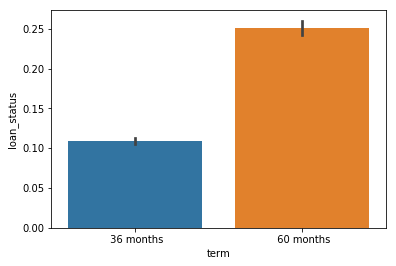

In [24]:
#univariate analysis
#term
sns.barplot(x='term', y='loan_status', data=df)
plt.show()

C:\Users\SNEHA\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


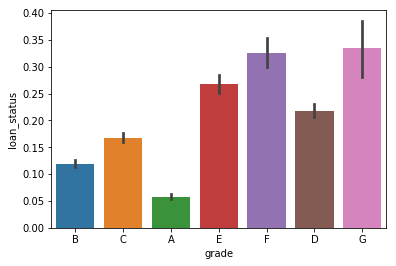

In [25]:
#grade
sns.barplot(x='grade', y='loan_status', data=df)
plt.show()

C:\Users\SNEHA\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


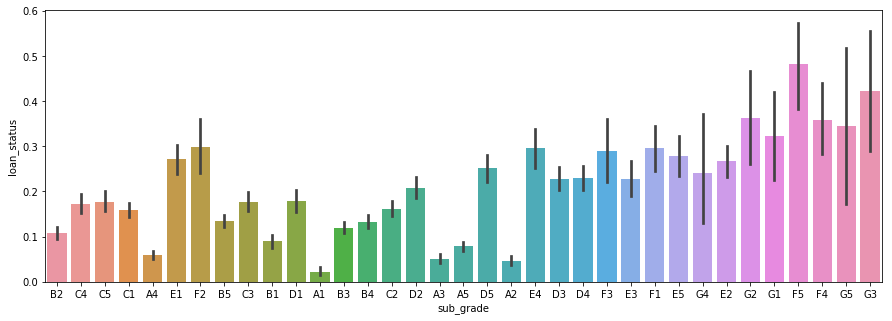

In [26]:
#sub_grade
plt.figure(figsize=(15,5))
sns.barplot(x='sub_grade', y='loan_status', data=df)
plt.show()

C:\Users\SNEHA\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


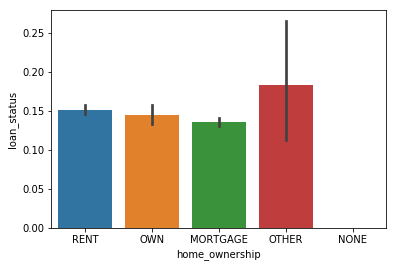

In [27]:
#home_ownership 
sns.barplot(x='home_ownership', y='loan_status', data=df)
plt.show()

C:\Users\SNEHA\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


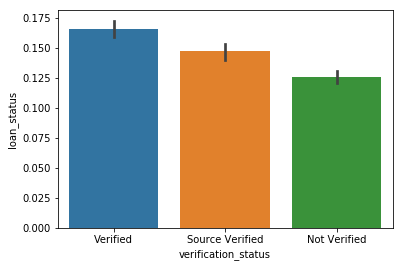

In [28]:
#verification_status

sns.barplot(x='verification_status', y='loan_status', data=df)
plt.show()

C:\Users\SNEHA\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


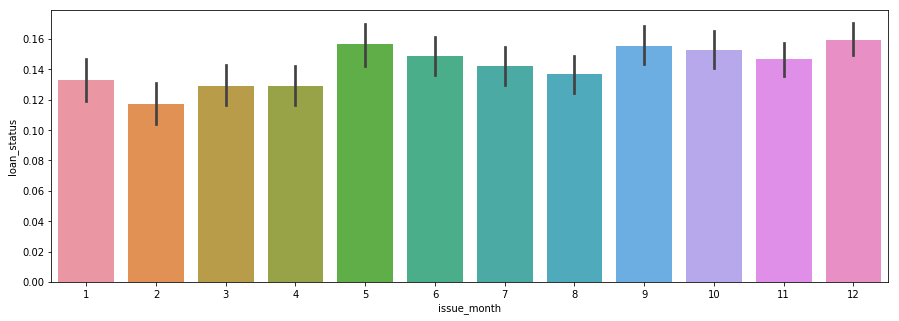

In [29]:
#Issue_month
plt.figure(figsize=(15,5))
sns.barplot(x='issue_month', y='loan_status', data=df)
plt.show()

C:\Users\SNEHA\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


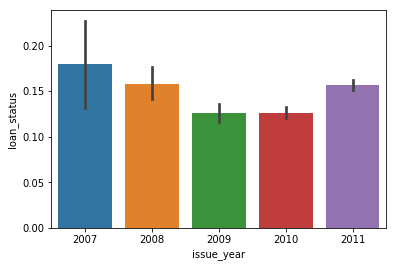

In [30]:
#Issue_year
sns.barplot(x='issue_year', y='loan_status', data=df)
plt.show()

C:\Users\SNEHA\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


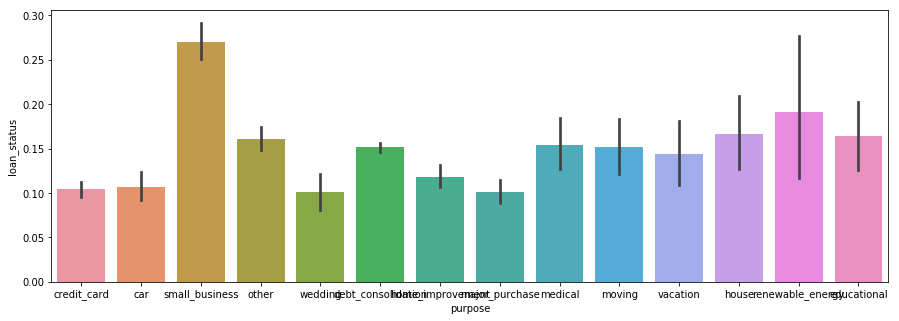

In [31]:
#purpose 
plt.figure(figsize=(15,5))
sns.barplot(x='purpose', y='loan_status', data=df)

plt.show()

In [32]:
df.addr_state.describe()

count     37544
unique       50
top          CA
freq       6768
Name: addr_state, dtype: object

C:\Users\SNEHA\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


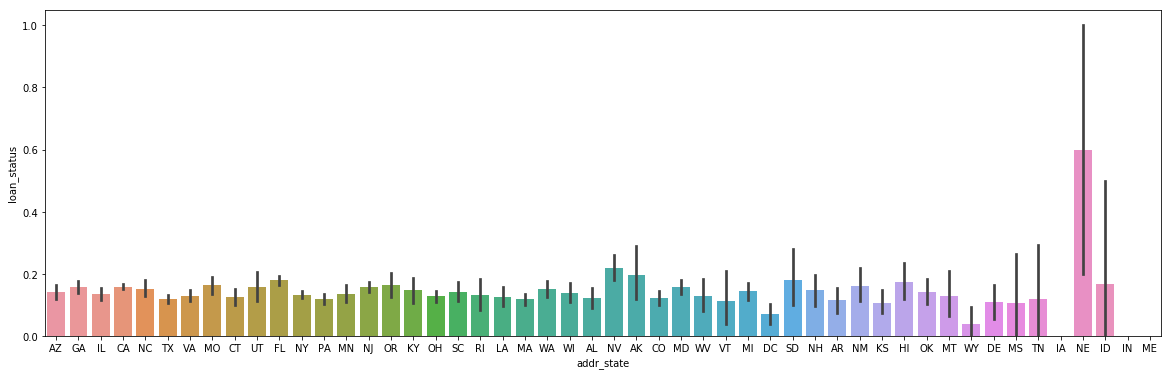

In [33]:
plt.figure(figsize=(20,6))
sns.barplot(x='addr_state', y='loan_status', data=df)

plt.show()

C:\Users\SNEHA\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


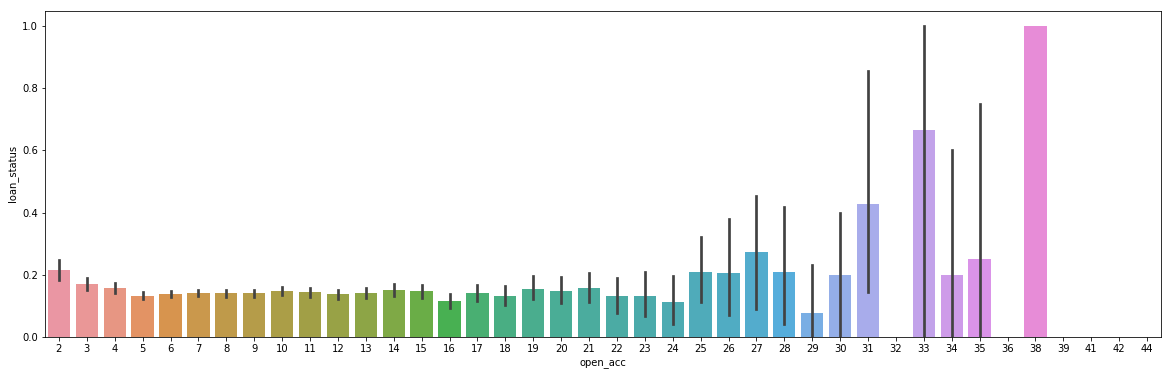

In [34]:
#open_acc
plt.figure(figsize=(20,6))
sns.barplot(x='open_acc', y='loan_status', data=df)

plt.show()

C:\Users\SNEHA\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


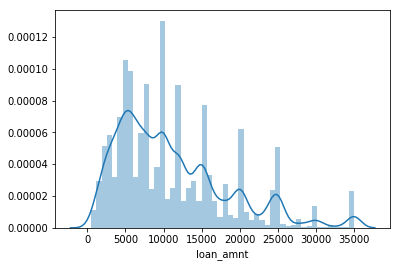

In [35]:
#lets get the idea of defaulters in other  continuos variable such as int_rate, annual_income etc
#lets get the distribution plot of such variable 
#loan_amnt                     
#funded_amnt                   
#funded_amnt_inv 
#int_rate                     
#installment
#emp_length  
#annual_inc
#dti 

sns.distplot(df['loan_amnt'])
plt.show()

In [36]:
#create division
def loan_amount_cat(x):
    if x < 5000:
        return('low')
    elif 5000 <= x < 15000:
        return('Medium')
    elif 15000 <= x < 25000:
        return('High')
    else:
        return('Very_high')
    
df['loan_amount_cat'] = df['loan_amnt'].map(loan_amount_cat)
df.loan_amount_cat.head()

0    Medium
1       low
2       low
3    Medium
5    Medium
Name: loan_amount_cat, dtype: object

C:\Users\SNEHA\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


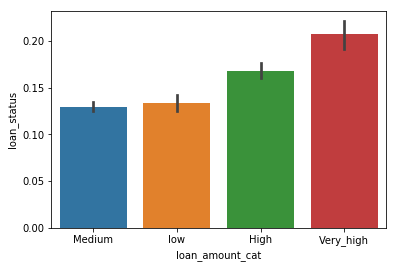

In [37]:
sns.barplot(x='loan_amount_cat', y='loan_status', data=df)

plt.show()

C:\Users\SNEHA\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


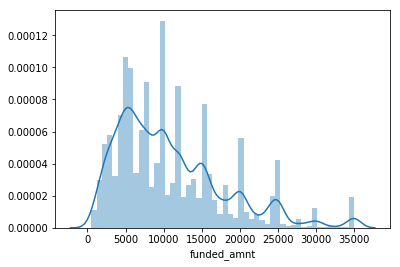

In [38]:
#funded_amnt 
sns.distplot(df['funded_amnt'])
plt.show()

C:\Users\SNEHA\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


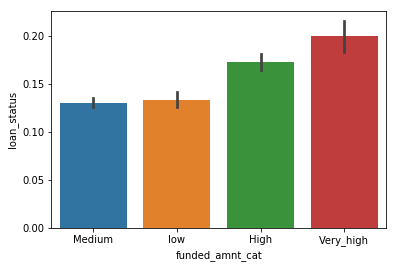

In [39]:
#create division
def funded_amnt_cat(x):
    if x < 5000:
        return('low')
    elif 5000 <= x < 15000:
        return('Medium')
    elif 15000 <= x < 25000:
        return('High')
    else:
        return('Very_high')
    
df['funded_amnt_cat'] = df['funded_amnt'].map(funded_amnt_cat)
sns.barplot(x='funded_amnt_cat', y='loan_status', data=df)

plt.show()

C:\Users\SNEHA\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


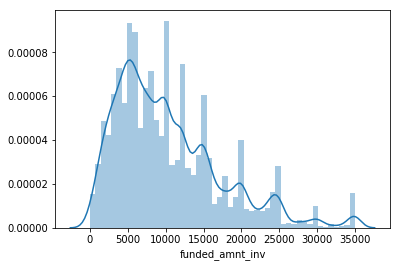

In [40]:
#funded_amnt 
sns.distplot(df['funded_amnt_inv'])
plt.show()

C:\Users\SNEHA\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


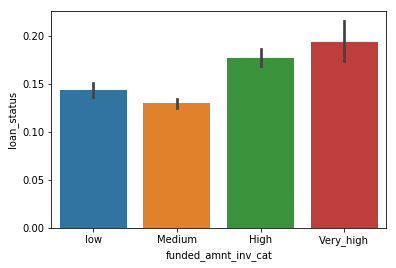

In [41]:
#create division
def funded_amnt_inv_cat(x):
    if x < 5000:
        return('low')
    elif 5000 <= x < 15000:
        return('Medium')
    elif 15000 <= x < 25000:
        return('High')
    else:
        return('Very_high')
    
df['funded_amnt_inv_cat'] = df['funded_amnt_inv'].map(funded_amnt_cat)
sns.barplot(x='funded_amnt_inv_cat', y='loan_status', data=df)

plt.show()

C:\Users\SNEHA\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


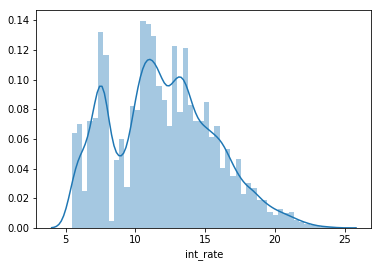

In [42]:
#int_rate 
sns.distplot(df['int_rate'])
plt.show()


C:\Users\SNEHA\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


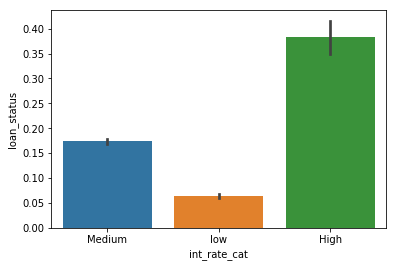

In [43]:
#create division
def int_rate_cat(x):
    if x < 10:
        return('low')
    elif 10 <= x < 20:
        return('Medium')
    else:
        return('High')
    
df['int_rate_cat'] = df['int_rate'].map(int_rate_cat)
sns.barplot(x='int_rate_cat', y='loan_status', data=df)
plt.show()

C:\Users\SNEHA\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


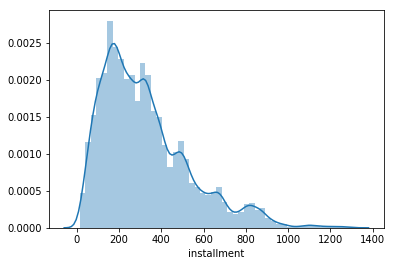

In [44]:
#installment 
sns.distplot(df['installment'])
plt.show()

C:\Users\SNEHA\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


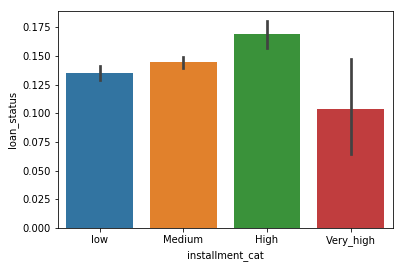

In [45]:
#create division
def installment_cat(x):
    if x < 200:
        return('low')
    elif 200 <= x < 600:
        return('Medium')
    elif 600 <= x < 1000:
        return('High')
    else:
        return('Very_high')
    
df['installment_cat'] = df['installment'].map(installment_cat)
sns.barplot(x='installment_cat', y='loan_status', data=df)
plt.show()

C:\Users\SNEHA\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


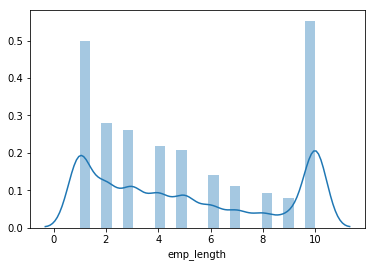

In [46]:
# emp_length
sns.distplot(df['emp_length'])
plt.show()

C:\Users\SNEHA\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


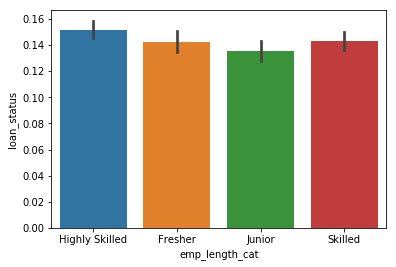

In [47]:
#create division
def emp_length_cat(x):
    if x < 2:
        return('Fresher')
    elif 2 <= x < 4:
        return('Junior')
    elif 4 <= x < 8:
        return('Skilled')
    else:
        return('Highly Skilled')
    
df['emp_length_cat'] = df['emp_length'].map(emp_length_cat)
sns.barplot(x='emp_length_cat', y='loan_status', data=df)
plt.show()

C:\Users\SNEHA\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


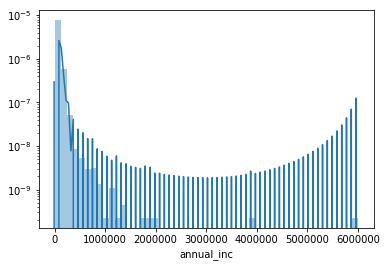

In [48]:
#annual_inc
sns.distplot(df['annual_inc'])
plt.yscale('log')
plt.show()

C:\Users\SNEHA\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


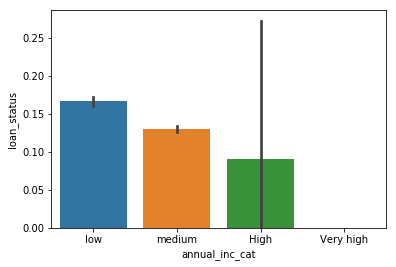

In [49]:
#create division
def annual_inc_cat(x):
    if x < 50000:
        return('low')
    elif 50000 <= x < 1000000:
        return('medium')
    elif 1000000 <= x < 2000000:
        return('High')
    
    else:
        return('Very high')
    
df['annual_inc_cat'] = df['annual_inc'].map(annual_inc_cat)
sns.barplot(x='annual_inc_cat', y='loan_status', data=df)
plt.show()

C:\Users\SNEHA\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


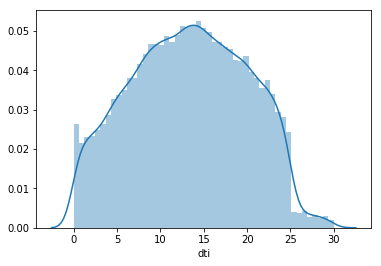

In [50]:
sns.distplot(df['dti'])
#plt.yscale('log')
plt.show()

C:\Users\SNEHA\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


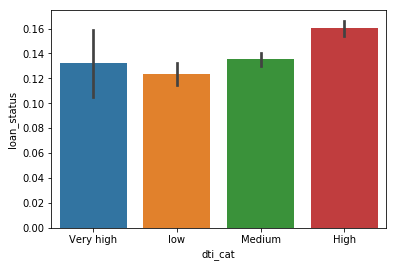

In [51]:
#create division
def dti_cat(x):
    if x < 5:
        return('low')
    elif 5 <= x < 15:
        return('Medium')
    elif 15 <= x < 25:
        return('High')
    else:
        return('Very high')
    
df['dti_cat'] = df['dti'].map(dti_cat)
sns.barplot(x='dti_cat', y='loan_status', data=df)
plt.show()

C:\Users\SNEHA\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


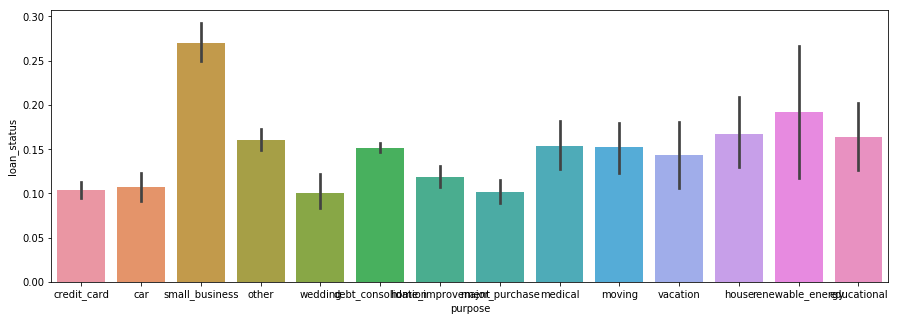

In [52]:
#If we look from the business perspective purpose  column should be considered defaulters are highly linked with the 
# reason of loan 
plt.figure(figsize=(15,5))
sns.barplot(x='purpose', y='loan_status', data=df)

plt.show()

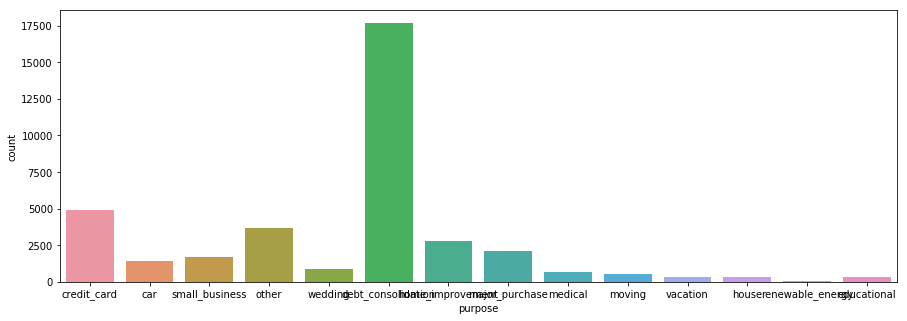

In [53]:
#As it can be seen small business  has highest value of defaulting
#To analyse it further lets calculate the expected value of defaulting in each category 
#choose such columns and perform segmented 
#analysis

plt.figure(figsize=(15, 5))
sns.countplot(x="purpose", data=df)
plt.show()

In [54]:
p=df.purpose.value_counts()
p

debt_consolidation    17675
credit_card            4899
other                  3713
home_improvement       2785
major_purchase         2080
small_business         1710
car                    1448
wedding                 913
medical                 656
moving                  552
house                   354
vacation                348
educational             317
renewable_energy         94
Name: purpose, dtype: int64

In [55]:
q=round(df.groupby('purpose').loan_status.mean(),2)
q

purpose
car                   0.11
credit_card           0.10
debt_consolidation    0.15
educational           0.16
home_improvement      0.12
house                 0.17
major_purchase        0.10
medical               0.15
moving                0.15
other                 0.16
renewable_energy      0.19
small_business        0.27
vacation              0.14
wedding               0.10
Name: loan_status, dtype: float64

In [56]:
r=p*q
r

car                    159.28
credit_card            489.90
debt_consolidation    2651.25
educational             50.72
home_improvement       334.20
house                   60.18
major_purchase         208.00
medical                 98.40
moving                  82.80
other                  594.08
renewable_energy        17.86
small_business         461.70
vacation                48.72
wedding                 91.30
dtype: float64

In [57]:
#from this we can choose four major purposes with highest expected value

#1.debt_consolidation    
#2.other
#3.credit_card
#4small_business
#5.home_improvement
#6.major_purchase

df=df[(df['purpose'] =='debt_consolidation')|(df['purpose'] =='other')|(df['purpose'] =='credit_card')
     |(df['purpose'] =='small_business') |(df['purpose'] =='home_improvement')]
df.purpose.head()

0           credit_card
2        small_business
3                 other
6    debt_consolidation
8        small_business
Name: purpose, dtype: object

C:\Users\SNEHA\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


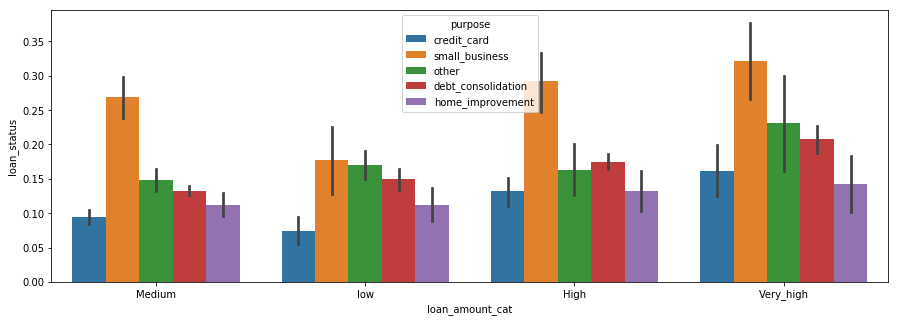

In [58]:
#loan_amount_cat 
plt.figure(figsize=(15,5))
sns.barplot(x='loan_amount_cat', y='loan_status', hue='purpose', data=df)
plt.show()

C:\Users\SNEHA\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


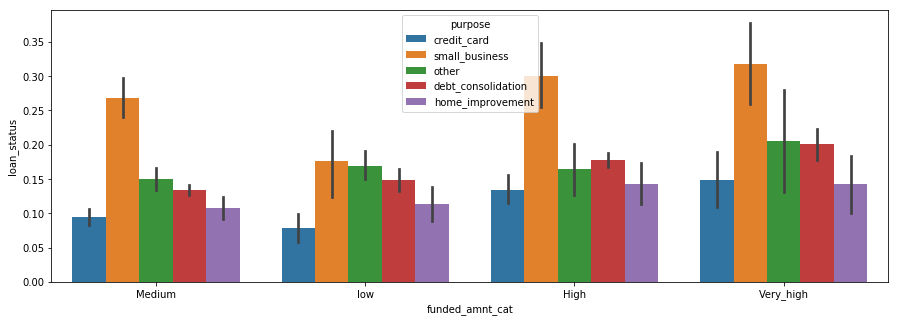

In [59]:
#funded_amnt_cat 
plt.figure(figsize=(15,5))
sns.barplot(x='funded_amnt_cat', y='loan_status', hue='purpose', data=df)
plt.show()

C:\Users\SNEHA\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


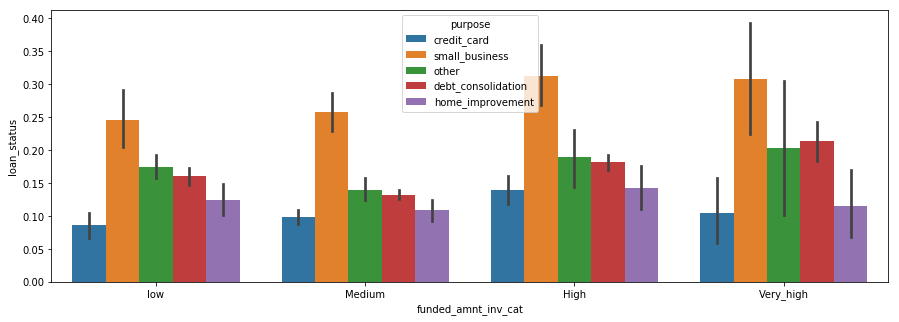

In [60]:
#funded_amnt_inv_cat  
plt.figure(figsize=(15,5))
sns.barplot(x='funded_amnt_inv_cat', y='loan_status', hue='purpose', data=df)
plt.show()

C:\Users\SNEHA\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


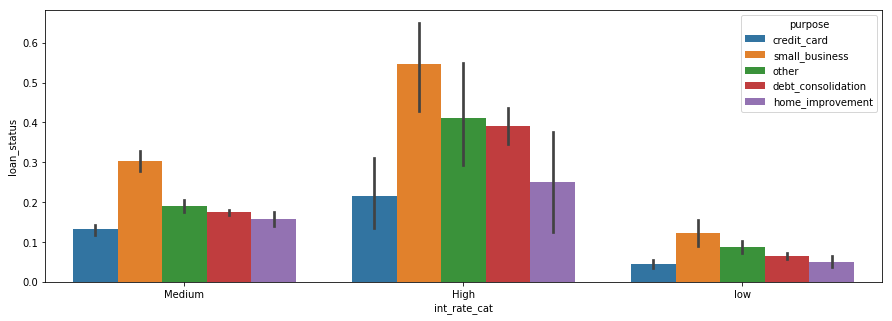

In [61]:
# int_rate_cat 
plt.figure(figsize=(15,5))
sns.barplot(x='int_rate_cat', y='loan_status', hue='purpose', data=df)
plt.show()

C:\Users\SNEHA\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


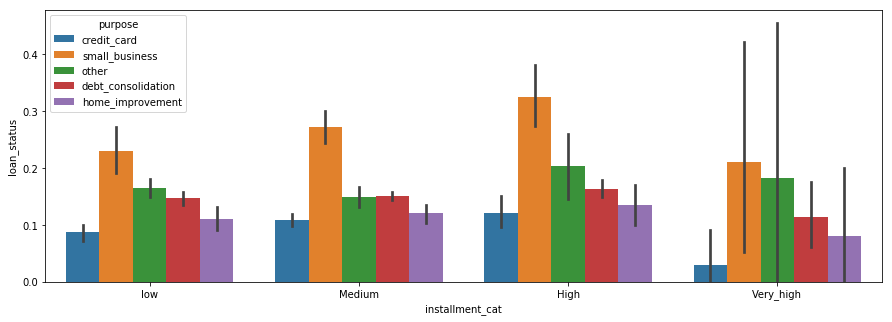

In [62]:
# installment_cat  
plt.figure(figsize=(15,5))
sns.barplot(x='installment_cat', y='loan_status', hue='purpose', data=df)
plt.show()

C:\Users\SNEHA\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


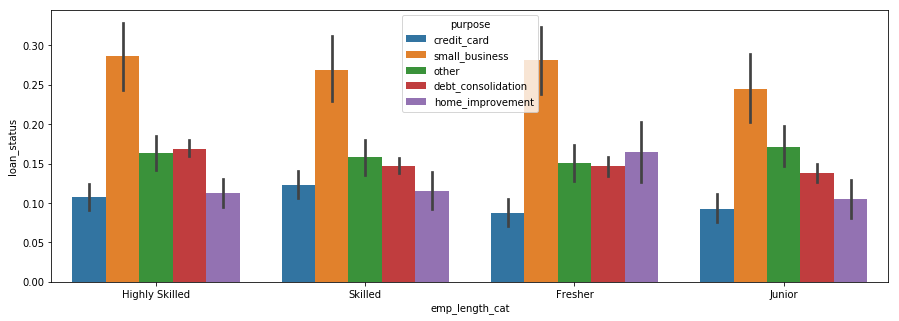

In [63]:
# emp_length_cat 
plt.figure(figsize=(15,5))
sns.barplot(x='emp_length_cat', y='loan_status', hue='purpose', data=df)
plt.show()

C:\Users\SNEHA\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


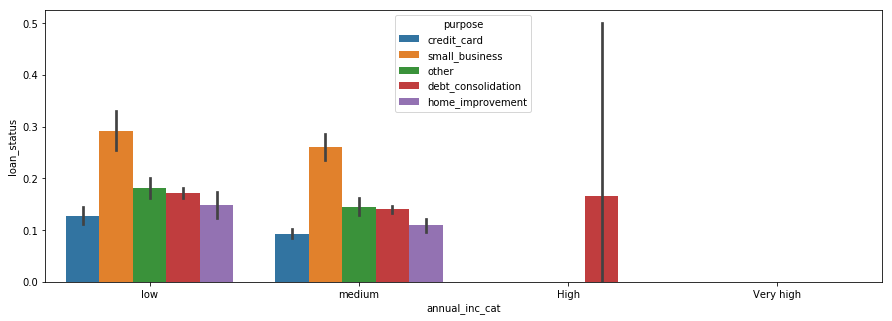

In [64]:
# annual_inc_cat  
plt.figure(figsize=(15,5))
sns.barplot(x='annual_inc_cat', y='loan_status', hue='purpose', data=df)
plt.show()

C:\Users\SNEHA\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


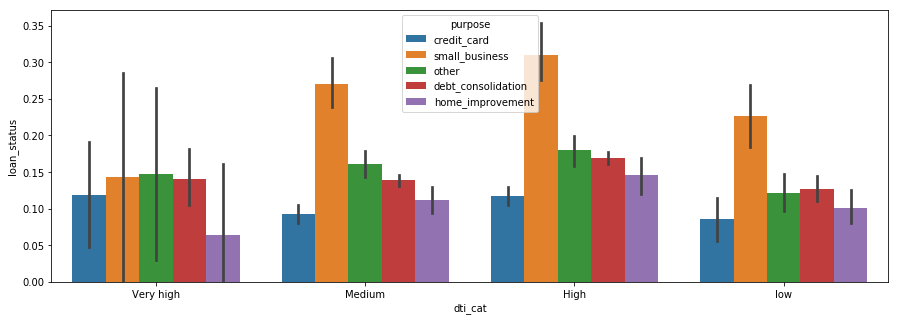

In [65]:
# dti_cat
plt.figure(figsize=(15,5))
sns.barplot(x='dti_cat', y='loan_status', hue='purpose', data=df)
plt.show()

C:\Users\SNEHA\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


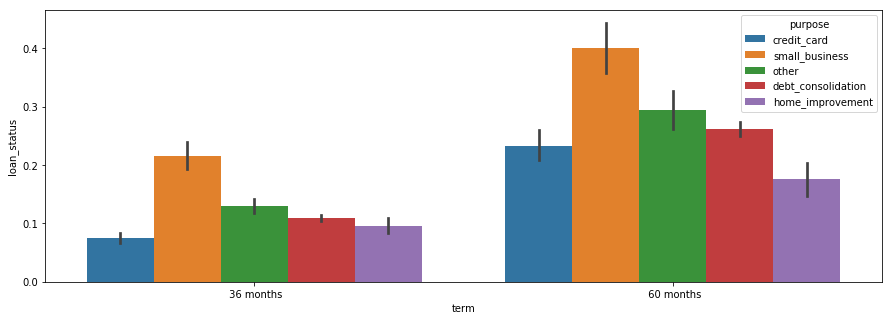

In [66]:
plt.figure(figsize=(15,5))
sns.barplot(x='term', y='loan_status', hue='purpose', data=df)
plt.show()

C:\Users\SNEHA\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


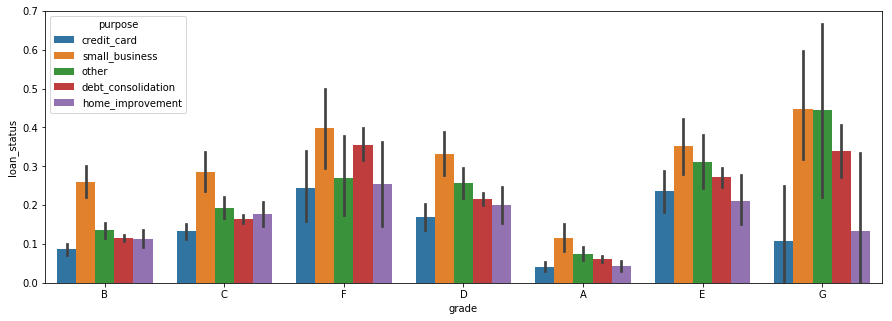

In [67]:
#grade
plt.figure(figsize=(15,5))
sns.barplot(x='grade', y='loan_status', hue='purpose', data=df)
plt.show()

C:\Users\SNEHA\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


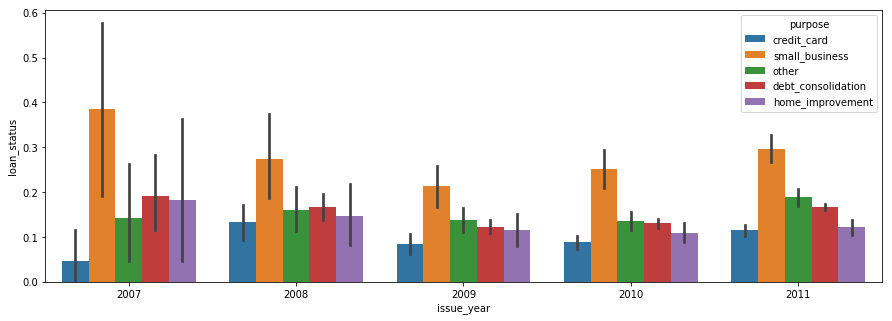

In [68]:
#issue_year
plt.figure(figsize=(15,5))
sns.barplot(x='issue_year', y='loan_status', hue='purpose', data=df)
plt.show()

C:\Users\SNEHA\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


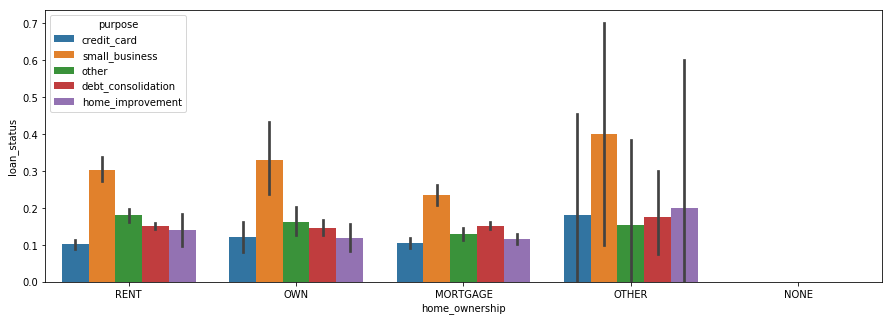

In [69]:
#home_ownership 
plt.figure(figsize=(15,5))
sns.barplot(x='home_ownership', y='loan_status', hue='purpose', data=df)
plt.show()

C:\Users\SNEHA\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


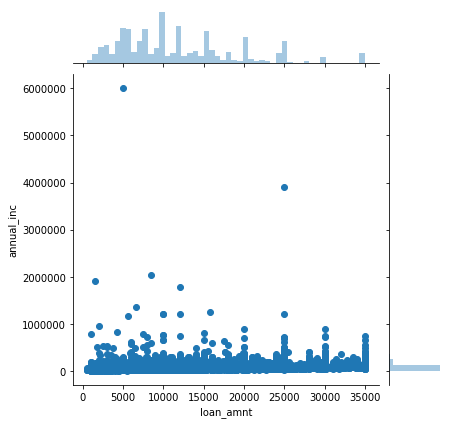

In [70]:
#Bivariate  Analysis
#loan_amount and annual income
sns.jointplot('loan_amnt', 'annual_inc', df)
plt.show()

C:\Users\SNEHA\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


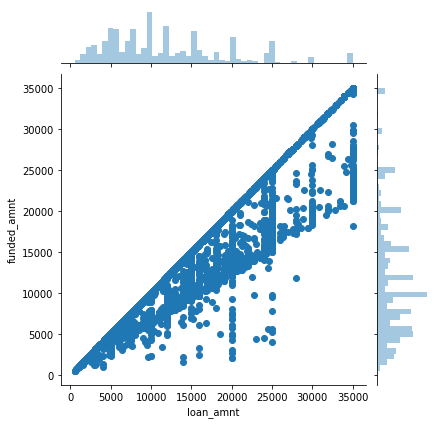

In [71]:
#loan_amount and funded amount
sns.jointplot('loan_amnt', 'funded_amnt', df)
plt.show()

C:\Users\SNEHA\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


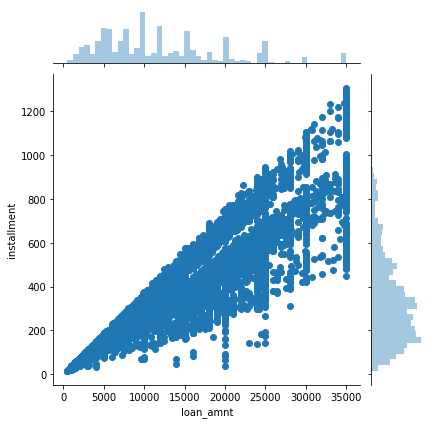

In [72]:
#loan amount and installment
sns.jointplot('loan_amnt', 'installment', df)
plt.show()

C:\Users\SNEHA\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


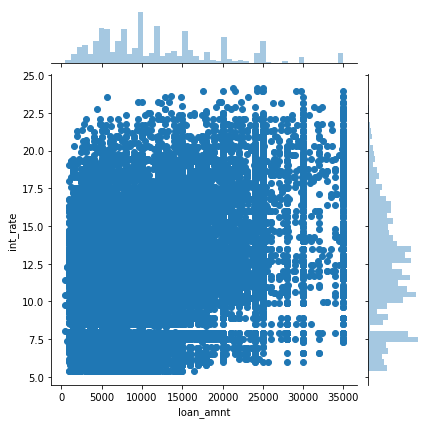

In [73]:
#loan amount and interest rate
sns.jointplot('loan_amnt', 'int_rate', df)
plt.show()

In [1]:
def outlier(x):
    plt.boxplot(final_pca_df1.x)
    Q1 = final_pca_df1.x.quantile(0.25)
    Q3 = final_pca_df1.x.quantile(0.75)
    IQR = Q3 - Q1
    final_pca_df1 = final_pca_df1[(final_pca_df1.x >= Q1 - 1.5*IQR) & (final_pca_df1.x <= Q3 + 1.5*IQR)]
    plt.boxplot(final_pca_df1.x)

outlier(PC1)

NameError: name 'PC1' is not defined